# CS166 Location-Based Project
## Traffic Intersections

### Table of Contents

[Overview](#overview)

[Feedback and Grading](#feedback-and-grading)

[Collecting Data](#collecting-data)

- [Option 1: Outside](#option1)
- [Option 2: Inside](#option2)

[Model and Simulation](#model-and-simulation)

- [Traffic Grid](#faq1)

[Analysis](#analysis)

- [Empirical vs Theoretical](#faq3)

[Resources](#resources)

### <a name="overview">Overview</a>

Traffic engineering is an important field in urban design. Cities plan roads to make the flow of traffic as smooth and safe as possible. Since there are many possible strategies and rules that could be implemented, we can use modeling and simulation to compare the strategies to see which one works best.

For this assignment, I am acting as a traffic engineer in my city. The mission is to find and compare different strategies to optimize traffic flow in a particular section of the city.

For this project report, I think of the city as my client. By considering what the needs of the city are, I can provide the best possible solutions to address those needs. In this report, I make the modeling assumptions clear, how the results were calculated, the process of modeling and simulation, the interpretations of the results, and the conclusions. Creating a cohesive and thorough report will show professionalism in this task.

### <a name="feedback-and-grading">Feedback and Grading</a>

In this project report I would like to receive feedback on my analysis of the modeling and simulation process of the traffic problem. I am interested in the similarities between the results of a simulation compared to the results compared to the expected theoretical concepts in the real world scenario. So, feedback should address these components of my work. In this assignment I aim to address the following Learning Outcomes from CS166: [#cs166-Modeling](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-Modeling), [#cs166-PythonImplementation](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-PythonImplementation), [#cs166-CodeReadability](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-CodeReadability), [#cs166-TheoreticalAnalysis](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-TheoreticalAnalysis), [#cs166-EmpiricalAnalysis](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-EmpiricalAnalysis), and [#cs166-Professionalism](https://forum.minerva.edu/app/outcome-index/learning-outcomes/cs166-Professionalism). As well as the foregrounded Habits of Mind and Foundational Concepts such as [#modeling](https://forum.minerva.edu/app/outcome-index/hcs/modeling), [#professionalism](https://forum.minerva.edu/app/outcome-index/hcs/professionalism), [#variables](https://forum.minerva.edu/app/outcome-index/hcs/variables), [#composition](https://forum.minerva.edu/app/outcome-index/hcs/composition), [#organization](https://forum.minerva.edu/app/outcome-index/hcs/organization), [#audience](https://forum.minerva.edu/app/outcome-index/hcs/audience), [#confidenceintervals](https://forum.minerva.edu/app/outcome-index/hcs/confidenceintervals), [#dataviz](https://forum.minerva.edu/app/outcome-index/hcs/dataviz), and [#descriptivestats](https://forum.minerva.edu/app/outcome-index/hcs/descriptivestats).

### <a name="collecting-data">Collecting Data</a>

To account for COVID-19 regulations and precautions, the location-based portion of this assignment can be completed outside or inside. I have chosen to complete most of the portion inside rather than outside.

### <a name="option1">Option 1: Outside</a>

In terms of data collection, the traffic problem observes different traffic data such as street configuration and vehicle density among other things. An interesting section of the city I live in with multiple intersecting streets is located in the Tenderloin. I decided to observe a section delimited by O'Farrel Street in the North which is a one way street that goes from West to East, Mason Street in the East which is a one way street that goes from North to South, Ellis Street in the South which is a one way street that goes from East to West, and Taylor Street in the West which is a one way street that goes from South to North. Using Google Maps, I am able to get a bird's eye view of the streets in my chosen section of the city. 

![birdview](birdview.png "Bird View")

**Figure 1.** San Francisco streets in a grid layout. One-way streets are labeled with arrows.

**Modeling Streets**
One of the measurements that is important for modeling these streets correctly is traffic density in each street. One way to do this can be by counting the total number of cars that pass in each direction, or counting the number of cars that enter the street for a predetermined amount of time, or measuring the time between consecutive cars that enter the street. A few different methods include counting the numbers that pass through a line at the beginning of the street and then computing the average or estimating an average. 

**Modeling Intersections**
One of the measurements that is important for modeling the intersections and traffic lights would be the conditions when they change. One way to do this is to observe the traffic lights at the intersections in the city region and figure out what strategy was used by the traffic engineers who installed them initially. It is important to make observations about the conditions during which traffic lights change from green to red and back and whether traffic lights at different intersections are independent or synchronized in some way.

However, all measurements described above require to be outside, and for this particular part of the project I have decided that I am not willing to go outside and rather do the majority inside.

### <a name="option2">Option 2: Inside</a>

Given that I preferred to do the work inside, I use the tools available online to collect traffic data for the area chosen. As established above, the chosen section of the city is in the Tenderloin area and have noted the street names and the allowed directions of travel in each street. To estimate the traffic density/flow rate along each street, Google Maps offer a traffic layer.

![traffic](traffic.png "Traffic")

**Figure 2.** Google Maps with the traffic layer enabled.

The traffic signal map in the resources provided little to no information about the traffic signals at the intersections of the chosen area. The most useful article about how traffic lights work in San Francisco is from 2018, where the author describes a plan to make traffic lights smarter. The evidence provided in this source seems more anecdotal than driven by actual data but it suggests that traffic lights used to be out of sync or in other words not synchronized. However, the plan to make traffic lights smarter would implement adaptive traffic signal operations which would adjust the signal timing of the red, yellow, and green lights. This change would accommodate changing road conditions and continuously distribute green light for optimum traffic signal options and improve travel time and reduce congestion. Based on traffic data from the Traffic layer in Google Maps, there is no clear suggestion of a strategy in place, but we can assume that there might be a strategy that uses adaptive traffic signal operations. Perhaps, with the implementation of that system, traffic lights would be synchronized by that strategy. Also, the traffic in the map might not be representative of what the chosen area usually looks like.

### <a name="model-and-simulation">Model and Simulation</a>

Using the data collected through the online tools, the model of the traffic is simulated in the section of the city chosen. The implementation is a grid-based simulation that makes a few simplifying assumptions about the system. The initial starting point for the rules that govern this agent-based model come from the [cellular automaton model for freeway traffic](https://course-resources.minerva.kgi.edu/uploaded_files/mke/YpqvNV/nagel-schreckenberg.pdf). Further rules and initial values are needed for creating a model that takes into account all the possible interactions in a grid system. As a traffic engineer, I notice and I am thankful for previous urban designers and traffic engineers to have created this real world scenario as close as possible to the grid-based design rather than curved streets or three-way intersections. This not only allows for better transit and traffic accross the model but also in real life too. Some of the assumptions, rules, and parameters of the model include considerations for the length of the road, the density of cars on the road, the speed limit, the probability of a car slowing down, the number of lanes in a road, the time between different colors of traffic lights, and the average traffic flow among other measurements and metrics.

The [TrafficSimulation](https://nbviewer.org/urls/course-resources.minerva.kgi.edu/uploaded_files/mke/00212840-6806/traffic-simulation-examples.ipynb) code from Nagel & Schreckenberg was used in an attempt to design similar specifications that follow the ground rules already provided. For example, rules that govern the update of the position and speed of the car as observed in Session 9 - Synthesis: Connecting theory and simulation. This opportunity served as a chance to go back to look at the problem for traffic simulation and iterate on previous work to provide better modeling, simulation, and approximations using the tools available. The traffic simulation observes an initial spike and increase in traffic flow as the car density increases which represents free flowing traffic, then the number of cars that can go at maximum speed decreases so there is a slow down of traffic leading to less traffic flow and increased car density. The assumptions about the acceleration and deceleration of cars allows for a similar analysis which works for single road as well as extending it to multiple roads that intersect. Traffic ligths represent a mechanism through which cars follow rules that determine whether they can turn at an intersection or not.

In [1]:
import numpy as np # Import relevant library numpy for array operations

class TrafficSimulation:
    """
    Traffic simulation object to model the different aspects of traffic
    such as the distribution of cars along the road, the probability of
    slowing down, the speed of the cars, and any other additional factor.
    """

    def __init__(self, road_length = 100, car_density = 0.2, prob_slowdown = 0.5, max_speed = 5):
        
        """
        road_length (int); number of cells in the road, default value is 100

        car_density (float); fraction of cells that have a car on them, default value is 0.2

        prob_slowdown (float); probability that a car randomly slows down by 1 during 
        an update step, default value is 0.5

        max_speed (int); maximum speed in car cells per update step, default value is 5
        """
        
        self.road_length = road_length
        self.car_density = car_density
        self.max_speed = max_speed
        self.prob_slowdown = prob_slowdown

        # Create an empty road, use -1 for an empty road
        self.state = np.full(self.road_length, -1, dtype=int)
        
        # Use numpy random operation to obtain random number for location of cars
        random_location = np.random.choice(range(self.road_length),
                                          size=int(round(car_density * self.road_length)),
                                          replace=False)
        
        # Assign a random initial speed
        self.state[random_location] = np.random.randint(0, self.max_speed + 1, size=len(random_location))

        # Keep count of the time steps with a counter for each step
        self.time_step = 0
        
        # Keep track of average traffic flow for each step of the simulation
        self.average_traffic_flow = []

    def updateSimulation(self, different = True):
        
        """
        Advance one time step in the simulation.
        """
        
        # This method will use as default the different strategy for updating time step unless
        # otherwise specified in the function call
        if different:
            return self.updateSimulationDifferent()
        
        # Update car speeds by iterating through the length of the road
        for i in range(self.road_length):
            
            # For every scenario where the road contains interacting agents
            if self.state[i] != -1:
                
                # Assign a distance to be the number of empty cells between cars
                distance = 1
                
                # Increase the distance parameter given the boolean expression
                while self.state[(i + distance) % self.road_length] == -1:
                    distance += 1
                    
                # The car accelerates when the car has not reached max speed
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                    
                # The car decelerates when the state is greater than or equal to distance parameter
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                    
                # Apply randomization for the probability of slowing down
                if ((self.state[i] > 0) and (np.random.uniform() < self.prob_slowdown)):
                    self.state[i] -= 1

        # Cars are assigned a new state which means that they move forward
        new_state = np.full(self.road_length, -1, dtype=int)
        
        # Iterate through the length of the road
        for i in range(self.road_length):
            
            # Assign the state to a cell variable
            cell = self.state[i]
            
            # Check the cell contains a given state
            if cell != -1:
                # Update the new state for the given cell
                new_state[(i + cell) % self.road_length] = cell
                
        # Update the state
        self.state = new_state
        
        # Update the count of the time steps
        self.time_step += 1

        # Update average traffic flow
        self.average_traffic_flow.append(sum(self.state[self.state > 0]) / self.road_length)

    def updateSimulationDifferent(self):
        
        """
        Advance one time step in the simulation using a different method from before.
        """
        
        # For any cell whose state is greater than or equal to 0 obtain the location 
        car_location = np.where(self.state >= 0)[0]
        
        # In the case of no cars in the road, avg traffic flow is 0 and time step gets updated 
        if len(car_location) == 0:
            self.average_traffic_flow.append(0)
            self.time_step += 1
            return

        # Get the current speed given the location 
        car_speed = self.state[car_location]
        
        # Get the distance between cars in the road
        car_distance = np.ediff1d(np.concatenate((car_location,
                                                  [car_location[0] + self.road_length])))
        
        # Where the speed of car is not the max, it increases so it accelerates
        car_speed = np.where(car_speed + 1 <= self.max_speed, car_speed + 1, self.max_speed)
        
        # The car decelerates when the current speed is greater than or equal to distance parameter
        car_speed = np.where(car_speed >= car_distance, car_distance - 1, car_speed)
        
        moving_car_location = np.where(car_speed > 0)[0]
        
        car_speed[moving_car_location] -= (np.random.uniform(
            size = len(moving_car_location)) < self.prob_slowdown)

        # Cars move forward given the simulated car speed
        car_location += car_speed
        car_location %= self.road_length
        self.state.fill(-1)
        self.state[car_location] = car_speed

        # Update the count of the time steps
        self.time_step += 1
        
        # Update average traffic flow 
        self.average_traffic_flow.append(sum(car_speed) / self.road_length)

    def displayState(self):
        
        """
        Print out the current state of the simulation.
        """
        
        print(''.join('.' if x == -1 else str(x) for x in self.state))

In [2]:
# Running the simulation 200 times at various traffic densities to
# record results. The maximum speed in this run is 5 and the 
# probability of slowing down is 0.5 (50%)

trials = 200 # Number of times to repeat the simulation
densities = np.linspace(0, 1, 101) # Various traffic densities
average_flow = []  # The average traffic flows get recorded here

for density in densities:
    traffic_flow = []
    
    for trial in range(trials):
        sim = TrafficSimulation(road_length = 100, 
                                car_density = density, 
                                max_speed = 5, 
                                prob_slowdown = 0.5)
        
        # Run steps to reach an equilibrium state
        for step in range(50):
            sim.updateSimulation()
        
        # Record the final average traffic flow
        traffic_flow.append(sim.average_traffic_flow[-1])
        
    average_flow.append(traffic_flow)
    
average_flow = np.array(average_flow)

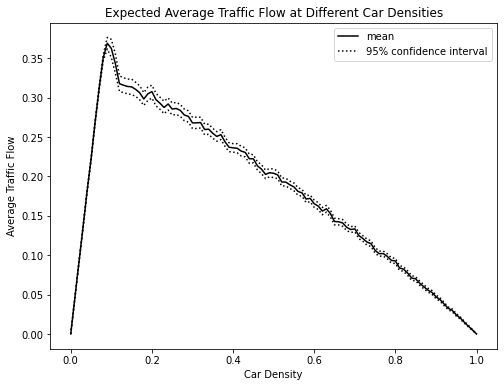

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as sts

plt.figure(figsize = (8, 6))
plt.title('Expected Average Traffic Flow at Different Car Densities')
plt.xlabel('Car Density')
plt.ylabel('Average Traffic Flow')
flow_mean = np.mean(average_flow, axis=1)
std_err = sts.sem(average_flow, axis=1)
plt.plot(densities, flow_mean, 'k-', label='mean')
plt.plot(densities, flow_mean - 1.96 * std_err, 'k:', label='95% confidence interval')
plt.plot(densities, flow_mean + 1.96 * std_err, 'k:')
plt.legend()
plt.show()

**Figure 3.** Average traffic flow varies with car density

In [4]:
import matplotlib.pyplot as plt
import random
import scipy.stats as sts

class StreetSimulation:
    def __init__(self, road_length = 100, car_density = 0.2, 
                 prob_slowdown = 0.5, max_speed = 5, lanes = 1, 
                 name = None, traffic_lights_positions = [100]):
        
        """
        This class handles simulation for the street with configurability of lanes, and methods to run it
        """
        
        # Length of the road
        self.road_length = road_length
        
        # Car density of the road
        self.car_density = car_density
        
        # Maximum speed allowed in the road
        self.max_speed = max_speed
        
        # The proability of slowing down
        self.prob_slowdown = prob_slowdown
        
        # Configurability of lanes in the street
        self.lanes_state = []
        
        # Timer for the traffic lights
        self.traffic_timer = 30
        
        # Traffic light status
        self.traffic_red = {}
        
        # Traffic light positions
        self.traffic_lights_positions = traffic_lights_positions
        
        # Number of lanes in the street
        self.lanes = lanes
        
        # Keeps track of traffic lights recently changed
        self.recently_changed = {}
        
        # Track the average traffic flow per lane
        self.average_traffic_flow = {}
        
        # The average traffic flow among all the lanes
        self.final_average_traffic_flow = []
        
        # Create the traffic lights and turn them all green for initializing
        for traffic_light in self.traffic_lights_positions:
            self.recently_changed[traffic_light] = [False] * self.lanes
            self.traffic_red [traffic_light] = False
        
        # Loops through each lane
        for lane in range(lanes):
            
            # Reset the state of the lane
            self.state = None
            
            # Creates an empty road, which means there are no cars in the road
            self.state = np.full(self.road_length, -1, dtype=int)
            
            # Randomizing the locations of cars in the road given the density
            random_location = np.random.choice(range(self.road_length),
                                               size = int(round(car_density * self.road_length)),
                                               replace = False)
            
            # Give each car a random initial speed
            self.state[random_location] = np.random.randint(0, self.max_speed + 1, 
                                                            size = len(random_location))
            self.lanes_state.append(self.state)
            self.average_traffic_flow[lane] = []
            
        # Keep track of the time steps and average traffic flow at each step
        self.time_step = 0  
        
    def updateSimulation(self):
        
        """
        This function moves the simulation by one time step
        """
        
        # This variable tracks the flow of the street
        flow_sum = 0
        
        # Loop through each lane and its state
        for lane_no, state in enumerate(self.lanes_state):
            
            start_point = 0
            
            # Loop through each part of the road
            for index in range(len(self.traffic_lights_positions) + 1):
                
                # Check if it is not the last part of the street
                if index < len(self.traffic_lights_positions): 
                    
                    # Assign the traffic light position
                    light = self.traffic_lights_positions[index]
                    
                    # Check if the traffic light is red
                    if self.traffic_red[light]: 
                        self.lanes_state[lane_no][light] = 0
                    
                    # If it is not red and it is still zero
                    elif self.lanes_state[lane_no][light] == 0 and self.recently_changed[light][lane_no]:
                        
                        # Change the traffic light to green
                        self.lanes_state[lane_no][light] = -1
                        
                        # Track the change in traffic light
                        self.recently_changed[light][lane_no] = False                        
                        
                    end_point = light
                    
                else: 
                    end_point = self.road_length
                    
                for i in range(start_point, end_point):
                    if i in self.traffic_lights_positions:
                        if self.traffic_red[i]:
                            continue
                    
                    if self.lanes_state[lane_no][i] != -1:
                        distance = 1
                        
                        while self.lanes_state[lane_no][(i + distance) % self.road_length] == -1:
                            distance += 1 # Updates the distance parameter

                        # The car accelerates as long as it has not reached max speed
                        if self.lanes_state[lane_no][i] < self.max_speed:
                            self.lanes_state[lane_no][i] += 1

                        # The car decelerates provided that the distance between other cars allows it
                        if self.lanes_state[lane_no][i] >= distance:
                            self.lanes_state[lane_no][i] = distance - 1
                            
                        # Include randomness for the probability of slowing down
                        if ((self.lanes_state[lane_no][i] > 0) and
                            (np.random.uniform() < self.prob_slowdown)):
                            self.lanes_state[lane_no][i] -= 1
                
                start_point = light
                
            # Update new state of cars which means moving forward
            new_state = np.full(self.road_length, -1, dtype=int)
            
            for i in range(self.road_length):
                cell = self.lanes_state[lane_no][i]
                
                if cell != -1:
                    new_state[(i + cell) % self.road_length] = cell
                    
            self.lanes_state[lane_no] = new_state

            # Update average traffic flow history
            self.average_traffic_flow[lane_no].append(
                sum(self.lanes_state[lane_no][self.lanes_state[lane_no] > 0]) / self.road_length)
            
            flow_sum += self.average_traffic_flow[lane_no][-1]
        
        # Increase the time step after update steps
        self.time_step += 1
        
        # Calculate the final average traffic flow 
        self.final_average_traffic_flow.append(flow_sum/self.lanes)

    def change_traffic_light(self, current_traffic, position):
        
        """
        This methods switchs the traffic light in a certian intersection
        """
        
        # Change the determined traffic light to the given state
        self.traffic_red[position] = current_traffic
        self.recently_changed[position] = [True]*self.lanes

    def display(self):
        
        """
        This method prints out the current state of the simulation.
        """
        
        for state in self.lanes_state:
            print(''.join('.' if x == -1 else str(x) for x in state))

In [5]:
class IntersectionSimulation:
    def __init__(self, streets, prob_turning = 0.2):
        
        """
        This class handles the intersections between the streets, 
        and it helps in regulating the traffics to maintain a synced system
        """
        
        # Instaces from the street class
        self.streets = streets
        
        # The traffic direction, True means the flow is vertical
        self.traffic_dir = [False, False, False, False]
        
        # The current time step
        self.time_step = 0
        
        # These variables determine the traffic timers based on car density
        self.shift_traffic = 10 * streets["OFarrell"].car_density
        self.ellis_traffic = 10 * streets["Ellis"].car_density
        
        # The probability of turning in an intersection
        self.prob_turning = prob_turning
        
        # The intersections based on the city section 
        self.intersections_map = { 1: {"X": "OFarrell", "Y": "Taylor", "X_param" : 40, "Y_param" : 20},
                                   2: {"X": "OFarrell", "Y": "Mason", "X_param" : 20, "Y_param" : 40},
                                   3: {"X": "Ellis", "Y": "Taylor", "X_param" : 20, "Y_param" : 40},
                                   4: {"X": "Ellis", "Y": "Mason", "X_param" : 40, "Y_param" : 20}}
        
        # Update the traffic intially to reset them
        self.updateIntersectionSimulation (1)
        self.updateIntersectionSimulation (2)
        self.updateIntersectionSimulation (3)
        self.updateIntersectionSimulation (4)
    
    def updateIntersectionSimulation(self, intersection):
        
        """
        This method switches the traffic lights 
        """
        
        # Inverse the traffic light
        self.traffic_dir[intersection-1] = not self.traffic_dir[intersection-1]
        
        u_xcurrent = self.traffic_dir[intersection - 1]
        u_xpos = self.intersections_map[intersection]["X_param"]
        u_ycurrent = not self.traffic_dir[intersection - 1]
        u_ypos = self.intersections_map[intersection]["Y_param"]
        
        # Change the traffic for streets at the intersection
        self.streets[self.intersections_map[intersection]["X"]].change_traffic_light(u_xcurrent, u_xpos)
        self.streets[self.intersections_map[intersection]["Y"]].change_traffic_light(u_ycurrent, u_ypos)
            
    def runIntersectionSimulation(self, steps = 70, old_strategy = True):
        
        """
        This method runs the main simulation
        """
        
        # Specific traffic timer
        ellis_traffic_counter = 0 
        
        # Run the simulation for a number of steps
        for i in range(steps):
            
            # Determine when card turn at the intersections
            for intersection in self.intersections_map:
                
                x = self.intersections_map[intersection]["X"]
                y = self.intersections_map[intersection]["Y"]
                X_param = self.intersections_map[intersection]["X_param"]
                Y_param = self.intersections_map[intersection]["Y_param"]
                
                if X_param == 20:
                    
                    street_x_param_m1 = self.streets[x].lanes_state[-1][X_param - 1]
                    street_x_param_p1 = self.streets[x].lanes_state[0][X_param + 1]               
                    
                    if street_x_param_m1 != -1 and self.streets[y].lanes_state[-1][Y_param + 1] == -1:
                        if random.uniform (0, 1) <= self.prob_turning:
                            self.streets[y].lanes_state[-1][Y_param + 1] = street_x_param_m1
                            street_x_param_m1 = -1
                    
                    if street_x_param_p1 == -1 and self.streets[y].lanes_state[0][Y_param - 1] != -1:
                        if random.uniform (0, 1) <= self.prob_turning:
                            street_x_param_p1 = self.streets[y].lanes_state[0][Y_param - 1] 
                            self.streets[y].lanes_state[0][Y_param - 1]  = -1   

                elif X_param == 40:
                    
                    street_x_param_m1 = self.streets[x].lanes_state[0][X_param - 1]
                    street_x_param_p1 = self.streets[x].lanes_state[-1][X_param + 1]
                    
                    if street_x_param_m1 != -1 and self.streets[y].lanes_state[0][Y_param + 1] == -1:
                        if random.uniform (0, 1) <= self.prob_turning:
                            self.streets[y].lanes_state[0][Y_param + 1] = street_x_param_m1
                            street_x_param_m1 = -1
                    
                    
                    if street_x_param_p1 == -1 and self.streets[y].lanes_state[-1][Y_param - 1] != -1:
                        if random.uniform (0, 1) <= self.prob_turning:
                            street_x_param_p1 = self.streets[y].lanes_state[-1][Y_param - 1] 
                            self.streets[y].lanes_state[-1][Y_param - 1]  = -1  
                
            # Update all the streets using the updateSimulationMethod
            for street_name in self.streets:
                self.streets[street_name].updateSimulation()

            # Check for the strategy to be used in the simulation
            if old_strategy:
                if self.time_step % 8 == 0:
                    self.updateIntersectionSimulation(1)
                    self.updateIntersectionSimulation(2)
                    self.updateIntersectionSimulation(3)
                    self.updateIntersectionSimulation(4)
                
            else: 
                # The different strategy updates the traffic depending on density of cars in roads
                if self.time_step % self.shift_traffic == 0:
                    self.updateIntersectionSimulation(1)
                    self.updateIntersectionSimulation(2)
                
                # Update intersections differently depending of behavior
                # The waiting time changes between streets
                if self.traffic_dir[3] == True:
                    if ellis_traffic_counter == self.shift_traffic: 
                        self.updateIntersectionSimulation(3)
                        self.updateIntersectionSimulation(4)
                        ellis_traffic_counter = 0
                    else: 
                        ellis_traffic_counter += 1
                
                elif self.traffic_dir[3] == False:
                    if ellis_traffic_counter == self.ellis_traffic: 
                        self.updateIntersectionSimulation(3)
                        self.updateIntersectionSimulation(4)
                        ellis_traffic_counter = 0
                    else: 
                        ellis_traffic_counter += 1
            
            # Increase the time step by one
            self.time_step += 1

    
    def average_traffic_flow (self):
        
        """
        This method calculates the average flow rate for all the streets
        """
        
        flow_sum = 0
        
        for street in self.streets: 
            flow_sum += self.streets[street].final_average_traffic_flow[-1]
            
        return flow_sum / len(self.streets)

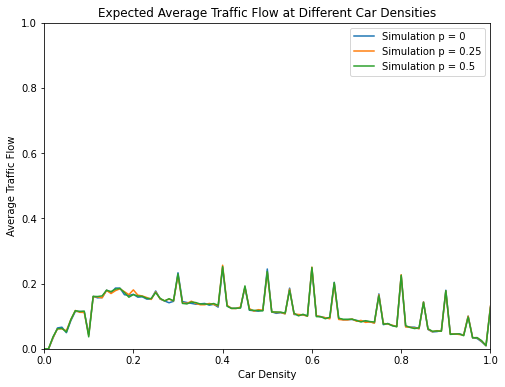

In [6]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    road_len = 50
    max_speed = 5
    prob_slowdown = 0.2
    lanes_no = 2
    traffic_param = [20, 40]

    p_slows = [0, 0.25, 0.5]
    car_densities = np.linspace(0, 1, 101)

    trials = 50 # Number of times to repeat the simulation
    sim_flow_results = {} # The results of average flow 

    for p_slow in p_slows:
        
        sim_flow_results[p_slow] = []
        
        for density in car_densities:
            
            flows = []
            
            for trial in range(trials):
                
                blocks = IntersectionSimulation({"Taylor" :
                                                 StreetSimulation(road_length = road_len,
                                                        car_density = density,
                                                        max_speed = max_speed,
                                                        prob_slowdown = prob_slowdown,
                                                        lanes = lanes_no,
                                                        traffic_lights_positions = traffic_param),
                                                 "OFarrell" :
                                                 StreetSimulation(road_length = road_len,
                                                        car_density = density,
                                                        max_speed = max_speed, 
                                                        prob_slowdown = prob_slowdown,
                                                        lanes = lanes_no,
                                                        traffic_lights_positions = traffic_param),
                                                 "Ellis" : 
                                                 StreetSimulation(road_length = road_len,
                                                        car_density = density,
                                                        max_speed = max_speed,
                                                        prob_slowdown = prob_slowdown,
                                                        lanes = lanes_no,
                                                        traffic_lights_positions = traffic_param),
                                                 "Mason" :
                                                 StreetSimulation(road_length = road_len, 
                                                        car_density = density, 
                                                        max_speed = max_speed, 
                                                        prob_slowdown = prob_slowdown, 
                                                        lanes = lanes_no,
                                                        traffic_lights_positions = traffic_param)})
                
                blocks.runIntersectionSimulation(100, old_strategy = False)
                
                # Record the final average traffic flow
                flows.append(blocks.average_traffic_flow())
                
            sim_flow_results[p_slow].append(np.mean(flows))

    plt.figure(figsize=(8, 6))
    plt.title('Expected Average Traffic Flow at Different Car Densities')
    plt.xlabel('Car Density')
    plt.ylabel('Average Traffic Flow')
    for p, flow in sim_flow_results.items():
        plt.plot(car_densities, flow, label=f'Simulation p = {p}')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

**Figure 4.** Average traffic flow varies with car density and probability of slow down 

The results of the simulation provide insight into the traffic system in the chosen area of the city with the parameters of the model closely resembling the data collected from the traffic density and traffic light behavior. The simulation also implements different strategies in term of traffic lights by applying them to the city section where the main streets intersect. For example, the difference in strategy between updating the state of the traffic light without regard to the current density of cars vs updating the state of traffic lights given some aspect about the system such as high density of cars.

**<a name="faq1">The Traffic Grid</a>** provides a good generalization for modeling traffic in real world scenarios. It allowed to implement four one-way streets (O'Farrel, Mason, Ellis, and Taylor) which meet at 4 intersections with traffic lights that govern traffic flow. As shown in the Google Maps image, the cars travel uni-directionally and can go straight or turn right; aditionally cars enter the system from different sources which might increase car density.

### <a name="analysis">Analysis</a>


The empirical results from the simulation provides a system that varies accross different iterations of the simulation since it is based on a limited set of assumptions. It can still further be improved and accuracy can increase by introducing other elements such as time of day or other assumptions that might change the traffic flow system. As a traffic engineer, I can consider whether the features such as probability of slow down and car density in the road are sufficient to determine a best strategy to implement in the city. For example, an improved system for traffic lights such as different time delays between lights or perhaps a different speed limit on certain streets.

**<a name="faq3">Empirical vs Theoretical</a>** results provide an opportunity to double check that general assumptions follow the theories that govern the interactions of the different agents in the system. Using a mathematical model as a traffic engineer I can make sure that I compare predictions with the simulation results. The mean-field approximation of the traffic model can be extended from single lane models to increased complexity with streets, intersections, and traffic lights. Using the mean-field approximation, we can look at the car density as it relates to the average traffic flow, a similar observation with the empirical results. Then, see the differences and similarities in behavior. One of the difference can be that the mean-field approximation considers the system at the equilibrium state which can be different from the results of simulating the system and iterating again and again.

In [7]:
# Code adapted from class session

def meanFieldApproximation(v, density, p_slowdown):
    v_max = len(v) - 1
    new_v = [0] * len(v)  # The updated speed probability vector
    
    # Establishing probabilities for car behavior in model
    car_prob = [density] * (v_max + 1)
    car_prob = [None] + [(1 - density) ** (distance - 1) * density for distance in range(1, v_max + 1)]
    car_prob.append(1 - np.sum(car_prob[1:]))
    
    for v_from in range(v_max + 1):
        
        # Assign the current speed of car
        speed = v_from
        
        # Determine a car to accelerate when speed is less than max
        if speed < v_max:
            speed += 1
        
        # Given the distance between cars, determine if stopping is necessary
        for distance in range(1, speed + 1):
            
            # Determine the probability of car at a given distance 
            car_at_distance = car_prob[distance]
            
            if distance > 1:
                new_v[distance - 1] += v[v_from] * car_at_distance * (1 - p_slowdown)
                new_v[distance - 2] += v[v_from] * car_at_distance * p_slowdown
                
            else:
                new_v[distance - 1] += v[v_from] * car_at_distance
        
        no_cars = 1 - np.sum(car_prob[1 : speed + 1])
        new_v[speed] += v[v_from] * no_cars * (1 - p_slowdown)
        new_v[speed-1] += v[v_from] * no_cars * p_slowdown
        
    return new_v

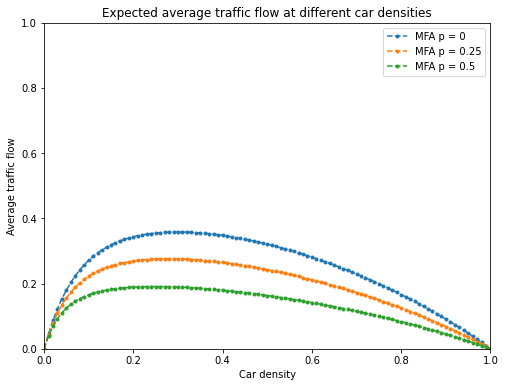

In [8]:
# Code adapted from class session

def average_speed(v):
    return np.sum(np.array(v) * np.arange(len(v)))

def average_flow(v, density):
    return density * average_speed(v)

max_speed = 5
p_slows = [0, 0.25, 0.5]
car_densities = np.linspace(0, 1, 101)

# Mapping results for average traffic flow at different densities
mfa_flow_results = {}  

for p_slow in p_slows:
    mfa_flow_results[p_slow] = []
    
    for density in car_densities:
        # Assumes a uniform distribution
        v = [1 / (max_speed + 1)] * (max_speed + 1)
        
        # Sanity check with assert statement
        assert abs(sum(v) - 1) < 1e-6  
        
        # Runs approximation until convergence
        for i in range(100):  
            v = meanFieldApproximation(v, density, p_slow)
            
            # Sanity check
            assert abs(sum(v) - 1) < 1e-6  
            
        # Appends results of approximation
        mfa_flow_results[p_slow].append(average_flow(v, density))

plt.figure(figsize=(8, 6))
plt.title('Expected average traffic flow at different car densities')
plt.xlabel('Car density')
plt.ylabel('Average traffic flow')

for p, flow in sim_flow_results.items():
    plt.plot(car_densities, mfa_flow_results[p], marker = '.', linestyle = '--', label = f'MFA p = {p}')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

**<a name="resources">Resources</a>** 

[Traffic Simulation](https://nbviewer.org/urls/course-resources.minerva.kgi.edu/uploaded_files/mke/00212840-6806/traffic-simulation-examples.ipynb)

[Cellular Automaton Model](https://course-resources.minerva.kgi.edu/uploaded_files/mke/YpqvNV/nagel-schreckenberg.pdf)

[Runtime Warning Solution](https://codesource.io/solved-runtimewarning-invalid-value-encountered-in-double_scalars/)

In [9]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
text-align:center;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")